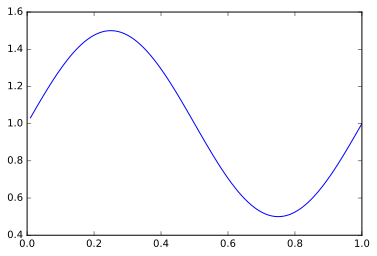

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
import matplotlib.pyplot as plt
from dolfin import *

# number of points
nc = 100

# Sub domain with periodicity
class PeriodicBoundary(SubDomain):
   def inside(self, x, on_boundary):
      return (near(x[0],0.0) and on_boundary)

   def map(self, x, y):
      y[0] = x[0] - 1.0

u0 = Expression("1.0+0.5*sin(2*pi*x[0])",degree=1)
mesh = UnitIntervalMesh(nc)
V = FunctionSpace(mesh, "CG", 1, constrained_domain=PeriodicBoundary())
u = Function(V)
u.interpolate(u0)
ua=u.vector().array()
x = V.tabulate_dof_coordinates()
i = np.argsort(x)
plt.plot(x[i],ua[i]);